In [7]:
import dlsfunctions as dls
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [3]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [4]:
theta_input = np.append(f_1, beta)

In [5]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

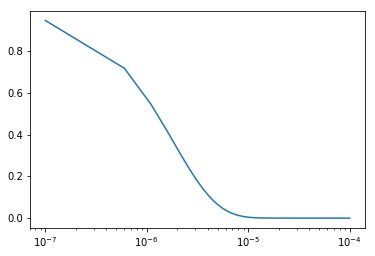

In [8]:
plt.semilogx(time_in, simulated_data)

In [9]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [10]:
start_pos = [theta_input + 1e-4*np.random.rand(ndim) for i in range(nwalkers)] 

In [11]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [12]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.37933333, 0.37766667, 0.37766667, 0.37      , 0.374     ,
       0.382     , 0.377     , 0.38133333, 0.37733333, 0.39933333,
       0.38733333, 0.386     , 0.37766667, 0.37333333, 0.383     ,
       0.35966667, 0.38466667, 0.37166667, 0.37833333, 0.37666667,
       0.37566667, 0.37033333, 0.36466667, 0.40333333, 0.36933333,
       0.38      , 0.38233333, 0.36166667, 0.38533333, 0.38533333,
       0.37866667, 0.38033333, 0.39866667, 0.40166667, 0.39166667,
       0.388     , 0.38333333, 0.389     , 0.37633333, 0.375     ,
       0.39033333, 0.387     , 0.374     , 0.38466667, 0.382     ,
       0.38266667, 0.37133333, 0.375     , 0.366     , 0.389     ,
       0.39133333, 0.393     , 0.36633333, 0.39333333, 0.38333333,
       0.378     , 0.36566667, 0.38666667, 0.38433333, 0.37566667,
       0.383     , 0.38533333, 0.37766667, 0.37466667, 0.38366667,
       0.38066667, 0.388     , 0.388     , 0.38066667, 0.38266667,
       0.38433333, 0.386     , 0.36833333, 0.378     , 0.37766

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

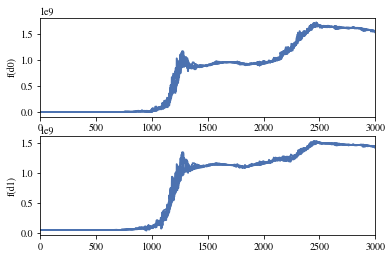

In [13]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

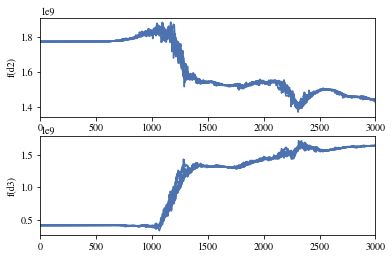

In [14]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [15]:
samples = sampler.chain[:,2800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [16]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19)
0.16,1.559992e+09,1.452887e+09,1.445277e+09,1.632756e+09,1.091942e+09,1.724360e+09,1.206183e+09,1.828310e+09,1.755154e+09,1.780608e+09,2.073538e+09,1.657835e+09,2.033467e+09,1.497243e+09,2.235379e+09,1.630887e+09,1.406807e+09,1.115318e+09,6.568165e+08,1.995194e+08
0.50,1.587407e+09,1.469979e+09,1.455315e+09,1.641540e+09,1.096599e+09,1.756238e+09,1.212363e+09,1.836185e+09,1.762172e+09,1.792649e+09,2.106561e+09,1.662223e+09,2.055547e+09,1.504360e+09,2.268076e+09,1.646799e+09,1.429953e+09,1.128678e+09,6.598396e+08,2.069554e+08
0.84,1.607361e+09,1.474800e+09,1.459474e+09,1.648042e+09,1.101986e+09,1.774870e+09,1.218569e+09,1.840480e+09,1.768439e+09,1.800435e+09,2.127335e+09,1.666307e+09,2.069504e+09,1.508991e+09,2.280587e+09,1.657177e+09,1.454286e+09,1.141481e+09,6.627714e+08,2.120584e+08


In [17]:
infer_d = np.zeros(20)
infer_d[0] = 1.587e9
infer_d[1] = 1.4699e9
infer_d[2] = 1.455e9
infer_d[3] = 1.6415e9
infer_d[4] = 1.0966e9
infer_d[5] = 1.7562e9
infer_d[6] = 1.212e9
infer_d[7] = 1.83618e9
infer_d[8] = 1.762e9
infer_d[9] = 1.7622e9
infer_d[10] = 2.107e9
infer_d[11] =1.6622e9
infer_d[12] = 2.055e9
infer_d[13] = 1.504e9
infer_d[14] = 2.268e9
infer_d[15] = 1.646e9
infer_d[16] = 1.43e9
infer_d[17] = 1.129e9
infer_d[18] = 6.598e8
infer_d[19] = 2.069e8

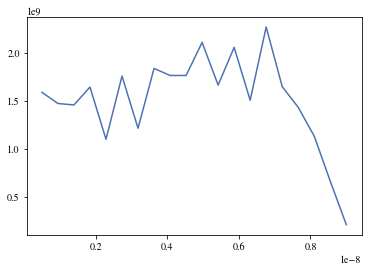

In [18]:
plt.plot(d, infer_d)